In [31]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from matplotlib.animation import FuncAnimation

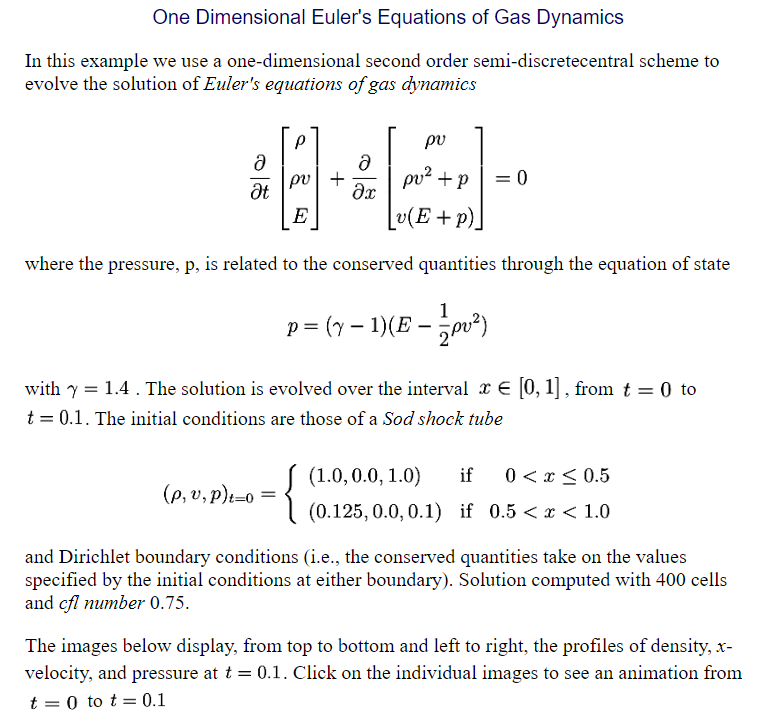

In [33]:
# Constants
gamma = 1.4
CFL = 0.75 
L = 1.0
ncells = 3000 
nx = ncells+1 
dx = L / ncells
x = np.linspace(0, L, nx)

In [34]:
r0 = np.zeros(nx)
u0 = np.zeros(nx)
p0 = np.zeros(nx)

r0 = np.where(x <= 0.5, 1.0, 0.125)
u0 = np.zeros(nx)
p0 = np.where(x <= 0.5, 1.0, 0.1)
tEnd = 0.10;

E0 = p0/((gamma-1.)*r0)+0.5*u0**2 # Total Energy density
a0 = sqrt(gamma*p0/r0)            # Speed of sound
q  = np.array([r0,r0*u0,r0*E0])   # Vector of variables

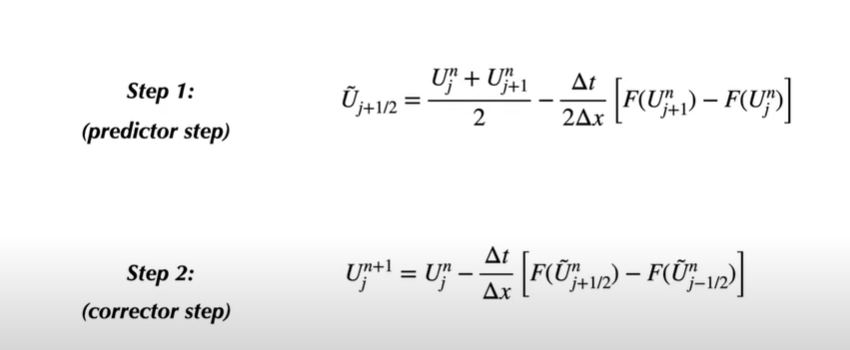

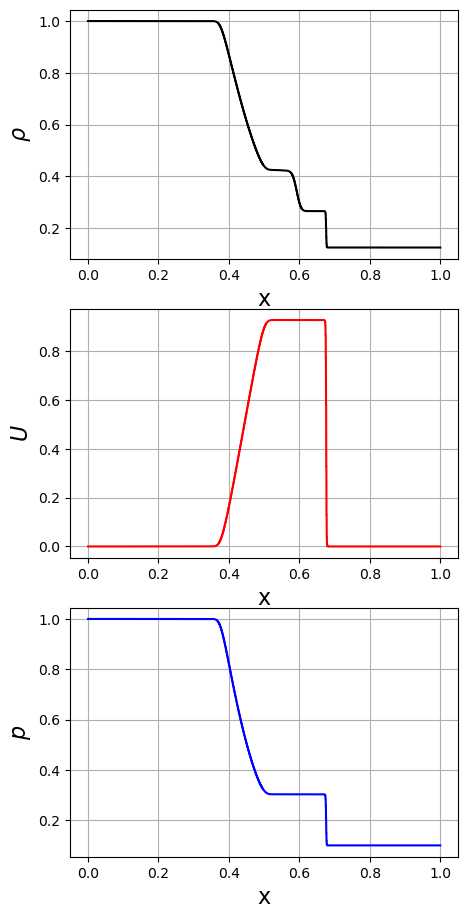

In [35]:
t  = 0
it = 0
a  = a0
dt=CFL*dx/max(abs(u0)+a0)       

while t < tEnd:
    
    #Predictor 
    q0 = q.copy();

    #variables
    r=q0[0];
    u=q0[1]/r;
    E=q0[2]/r;
    p=(gamma-1.)*r*(E-0.5*u**2)
    
    # Flux vector of conserved properties
    W0 = np.array(r*u)
    W1 = np.array(r*u**2+p)
    W2 = np.array(u*(r*E+p))
    flux=np.array([ W0, W1, W2 ])
    
    qm  = np.roll(q0, 1)
    qp  = np.roll(q0,-1)
    fm  = np.roll(flux, 1)
    fp  = np.roll(flux,-1)

    q = (qp+qm)/2. - dt/(2.*dx)*(fp-fm)
    
    
    
    q[:,0]=q0[:,0]; q[:,-1]=q0[:,-1] # BC
    
    # Compute primary variables
    rho=q[0]
    u=q[1]/rho
    E=q[2]/rho
    p=(gamma-1.)*rho*(E-0.5*u**2)
    a=sqrt(gamma*p/rho)
    
    #correct time step
    dt=CFL*dx/max(abs(u)+a)

    # Update time and iteration counter
    t=t+dt; it=it+1


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,11))
    
# Plot rho
axes[0].plot(x, rho, 'k-', label='$\\rho$')
axes[0].set_ylabel('$\\rho$', fontsize=16)
axes[0].set_xlabel('x', fontsize=16)
axes[0].grid(True)

    
# Plot U
axes[1].plot(x, u, 'r-', label='$U$')
axes[1].set_ylabel('$U$', fontsize=16)
axes[1].set_xlabel('x', fontsize=16)
axes[1].grid(True)

    
# Plot p
axes[2].plot(x, p, 'b-', label='$p$')
axes[2].set_ylabel('$p$', fontsize=16)
axes[2].set_xlabel('x', fontsize=16)
axes[2].grid(True)


plt.show()

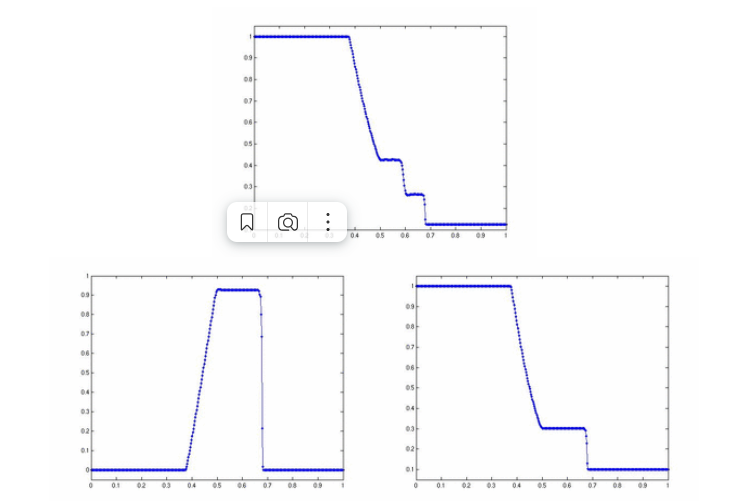

In [20]:
it

289